In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sympy for higher numerical precision of cross-product than np.cross
import sympy as s
def sympycross(u1,u2):
    u1_=s.Matrix(u1)
    u2_=s.Matrix(u2)
    cross=u1_.cross(u2_)
    cross=np.matrix([i[0] for i in np.array(cross).astype(np.float64)]).T
    return cross

In [3]:
def k_lattgen(theta,alpha): #generate k-vector with given in-plane and out-of-plane angle
    phi=np.sign(alpha)*np.arcsin(abs(np.sin(alpha)/np.cos(theta)))
    k= np.array([np.cos(theta)*np.sin(phi), np.sin(theta), np.cos(theta)*np.cos(phi)])
    return k

def normed(k): #normalize vector
    return k/np.linalg.norm(k)

def k_ingen(phi): #generate k-vector with given in-plane and out-of-plane angle
    k= np.array([np.sin(phi), 0, np.cos(phi)])
    return k

def M_transfer(k_in,k_out, r_s=-1, r_p=-1):
    s_vec=normed(sympycross(k_in,k_out))
    pin_vec=normed(sympycross(s_vec,k_in))
    pout_vec=normed(sympycross(s_vec,k_out))
    M=r_s*s_vec*s_vec.T+r_p*pout_vec*pin_vec.T
    return M

def angle(k1,k2):
    return float((np.arccos(np.abs(np.dot(k1.T,k2))))*360/2/np.pi)

Text(0.5, 0, 'projection angle mirror in inventor in °')

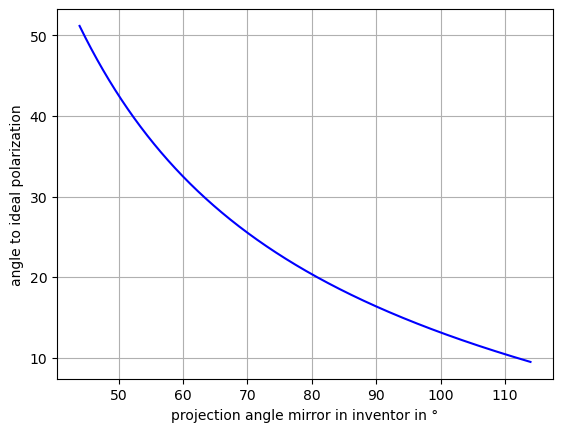

In [4]:
# results of calculation
coeff=(2*np.pi/360)
alpha=26.8/2*coeff# in-plane angle
theta=15.9*coeff # out-of-plane angle
pol_in=np.matrix([0,1,0]).T


k_out=np.matrix(k_lattgen(theta,alpha)).T
pol_ideal=normed(sympycross(np.matrix(k_lattgen(theta,-alpha)).T,np.matrix(k_lattgen(theta,alpha)).T))
k_out_xzproj=np.matrix(normed([float(k_out[0]),0,float(k_out[2])])).T
angle_0=angle(k_out_xzproj,np.matrix([0,0,1]).T) # find projection of k_out onto xy-plane


specified_mirror_range=[15,50]
beta_space=np.linspace(angle_0+2*specified_mirror_range[0],angle_0+2*specified_mirror_range[1],1000)*coeff
# beta_space=np.linspace(angle_0+0*specified_mirror_range[0],angle_0+5*specified_mirror_range[1],1000)*coeff
outangle_space=np.zeros(len(beta_space))
dotproduct_space=np.zeros(len(beta_space))

for i,beta in enumerate(beta_space):
    k_in=-np.matrix(k_ingen(beta)).T
#     plt.quiver(0,0,float(k_in[0]),float(k_in[2]),angles='xy', scale_units='xy', scale=1, color="red") # plot vectors, turn off bottom plot
#     plt.xlim(-1,1)
#     plt.ylim(-1,1)
    M=M_transfer(k_in,k_out)
    pol_out=M*pol_in
#     print(np.dot(pol_out.T,np.matrix([1,0,0]).T))
    if angle(k_in,k_out)>=2*specified_mirror_range[0] and angle(k_in,k_out)<=2*specified_mirror_range[1]:
        dotproduct_space[i]=np.dot(pol_out.T,pol_ideal)
        outangle_space[i]=angle(pol_out,pol_ideal)
    
    
plt.plot(beta_space/coeff,outangle_space, color="blue") # in real basis
plt.grid()
plt.ylabel("angle to ideal polarization")
plt.xlabel("projection angle mirror in inventor in °")

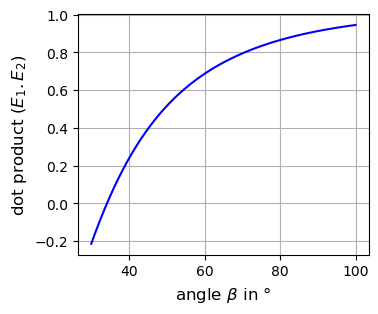

In [17]:
# dot product pols assuming symmetry
# fig=plt.figure(figsize =(15, 10)) 
textwidth=5.78853 #in
ratio=1.2
lengo=0.45*textwidth*ratio
fig=plt.figure(figsize=(lengo*ratio,lengo))

plt.plot((beta_space)/coeff-angle_0,np.cos(2*outangle_space*coeff), color="blue") # in real basis
plt.grid()
plt.ylabel("dot product $(E_1.E_2)$", fontsize=12)
plt.xlabel("angle $\\beta$ in °", fontsize=12)
# plt.savefig("images\polchange-single-mirror.pdf")
# plt.ylim(0.8,1)
plt.savefig("images/polchange-single-mirror.pdf", bbox_inches="tight")

# Periscope

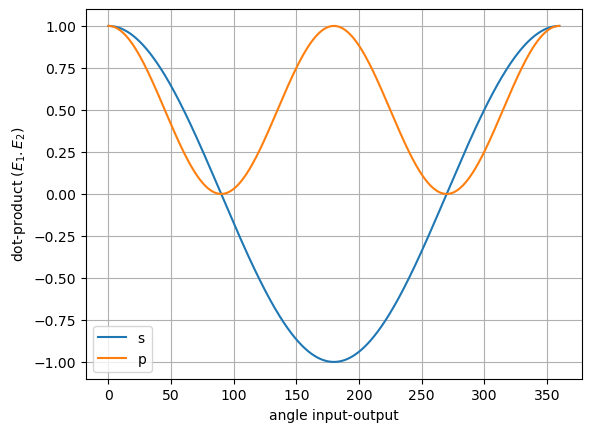

In [173]:
eps1=np.matrix([0,1,0]).T
eps1b=np.matrix([1,0,0]).T

k1=np.matrix([0,0,1]).T
k2=np.matrix([0,1,0]).T
M1=M_transfer(k1,k2)

angle=np.linspace(0,360,1000)*coeff
sol1=np.zeros(len(angle))
sol2=np.zeros(len(angle))
for i,ang in enumerate(angle):
    k3=k_ingen(ang)
    M2=M_transfer(k2,k3)
    M=np.dot(M2,M1)
    eps2=np.dot(M,eps1)
    eps2b=np.dot(M,eps1b)
    sol1[i]=float(np.dot(eps1.T,eps2))
    sol2[i]=float(np.dot(eps1b.T,eps2b))
    

plt.plot(angle/coeff,sol1, label="s")
plt.plot(angle/coeff,sol2, label="p")
plt.grid()
plt.ylabel("dot-product $(E_1.E_2)$")
plt.xlabel("angle input-output")
plt.legend()